In [1]:
import os

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

import warnings
warnings.filterwarnings('ignore')

In [4]:
os.getcwd().replace('02_Analyse_Single_Neuron_metrics','01_Explore_Allen_Brain_Observatory')

'/Users/yoshi/Documents/Reserch/code/Neural-Data-Analysis-Tutorials/01_Explore_Allen_Brain_Observatory'

In [5]:
# Get the current working directory and create a path for a new directory named "01_Data".
data_Dir = os.getcwd().replace('02_Analyse_Single_Neuron_metrics','01_Explore_Allen_Brain_Observatory') + '/01_Data'

# Create a directory for data, and use exist_ok=True to avoid errors if it already exists.
os.makedirs(data_Dir, exist_ok=True)

# Get the current working directory and create a path for a new directory named "02_Analysis".
analysis_Dir = os.getcwd() + '/02_Analysis'

# Create a directory for analysis, and use exist_ok=True to avoid errors if it already exists.
os.makedirs(analysis_Dir, exist_ok=True)

# Create a path for a new directory named "Tutorial_01_outputs".
output_Dir = analysis_Dir + '/Tutorial_02_outputs'

# Create a directory for outputs, and use exist_ok=True to avoid errors if it already exists.
os.makedirs(output_Dir, exist_ok=True)

In [6]:
# this path determines where downloaded data will be stored
manifest_path = os.path.join(data_Dir+'/', 'manifest.json')

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path, timeout=50*60)

print(cache.get_all_session_types())

['brain_observatory_1.1', 'functional_connectivity']


In [7]:
# load session information
sessions = cache.get_session_table()
brain_observatory_type_sessions = sessions[sessions["session_type"] == "brain_observatory_1.1"]
display(brain_observatory_type_sessions)

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"
739448407,2019-10-03T00:00:00Z,716813543,brain_observatory_1.1,112.0,M,wt/wt,625,2221,6,"[grey, VISam, nan, VIS, VISp, VISl, VISrl]"
742951821,2019-10-03T00:00:00Z,723627604,brain_observatory_1.1,120.0,M,wt/wt,893,2219,6,"[VISal, nan, grey, VISl, VISrl, VISp, VISpm, VIS]"
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


In [8]:
# download dataset of a specific session
session_id = 791319847
session_dir = data_Dir+'/session_'+str(session_id)
session = cache.get_session_data(session_id) 
sessions.loc[session_id]

published_at                                               2019-10-03T00:00:00Z
specimen_id                                                           769360779
session_type                                              brain_observatory_1.1
age_in_days                                                               116.0
sex                                                                           M
full_genotype                     Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt
unit_count                                                                  555
channel_count                                                              2229
probe_count                                                                   6
ecephys_structure_acronyms    [APN, DG, CA1, VISam, nan, LP, TH, VISpm, POL,...
Name: 791319847, dtype: object

In [9]:
session.structurewise_unit_counts

VISp     93
CA1      85
VISrl    58
VISl     56
VISam    49
VISal    43
SUB      41
CA3      33
DG       32
VISpm    17
LGv      16
LP        9
LGd       8
TH        4
ZI        4
CA2       3
POL       3
ProS      1
Name: ecephys_structure_acronym, dtype: int64

In [35]:
# Extract unit metrics
region = 'VISp'
units = session.units[session.units["ecephys_structure_acronym"] == region]

In [44]:
# Here are the summary of unit metrics
units

,waveform_PT_ratio,waveform_amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,L_ratio,...,ecephys_structure_id,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data
unit_id,,,,,,,,,,,,,,,,,,,,,
951061537,0.403143,173.468490,0.000851,226,88.80,4.750152,5.015605,0.010022,71.959187,0.002312,...,385.0,VISp,8588.0,1364.0,7795.0,probeC,See electrode locations,29999.993174,1249.999716,True
951061574,0.440010,187.532280,0.000076,232,105.54,6.114466,4.732604,0.003216,82.285718,0.000201,...,385.0,VISp,8593.0,1347.0,7801.0,probeC,See electrode locations,29999.993174,1249.999716,True
951061568,1.123639,157.562730,0.000794,231,975.39,6.929665,3.224386,0.010393,78.492807,0.000074,...,385.0,VISp,8593.0,1347.0,7801.0,probeC,See electrode locations,29999.993174,1249.999716,True
951061556,0.216003,150.624825,0.000046,229,92.56,5.033717,7.964678,0.000000,74.043491,0.000845,...,385.0,VISp,8593.0,1347.0,7801.0,probeC,See electrode locations,29999.993174,1249.999716,True
951061549,0.403958,104.883090,0.043402,228,228.16,2.263364,4.192932,0.264284,48.826263,0.017759,...,385.0,VISp,8593.0,1347.0,7801.0,probeC,See electrode locations,29999.993174,1249.999716,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951062833,0.466847,151.825245,0.000868,460,123.93,3.905109,0.939717,0.203935,48.555922,0.003555,...,385.0,VISp,8761.0,775.0,8035.0,probeC,See electrode locations,29999.993174,1249.999716,True
951062587,0.641743,80.871180,0.010055,409,132.09,3.368441,14.907381,0.032253,64.649537,0.017557,...,385.0,VISp,8761.0,775.0,8035.0,probeC,See electrode locations,29999.993174,1249.999716,True
951062854,0.405948,172.952715,0.001119,464,108.24,3.588702,0.937027,0.000000,58.013601,0.001124,...,385.0,VISp,8768.0,751.0,8046.0,probeC,See electrode locations,29999.993174,1249.999716,True


In [45]:
isi_violations = np.array(list(units['isi_violations']))
firing_rates = np.array(list(units['firing_rate']))
PT_ratios = np.array(list(units['waveform_PT_ratio']))

In [57]:
# Try to calculate unit metrics by yourself.
# First, get spike timing of each neuron.
spike_times = {} # Create empty dict
for unit_id in units.index:
    spike_times.update({unit_id:session.spike_times[unit_id]}) # update dict

In [87]:
# Calculate inter-spike interval
isi = {}
for unit_id in units.index:
    isi_tmp = np.diff(spike_times[unit_id]) # calculate the time interval of each spike event.
    isi.update({unit_id:isi_tmp}) 

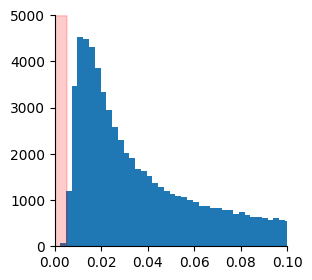

In [98]:
# Plot the distribution of inter-spike interval
plt.figure(figsize=(3,3))
plt.hist(isi[951061556],bins=10000);
plt.fill_betweenx(y=np.arange(0,5000),x1=0,x2=0.005, color='red', alpha=0.2, zorder=2)
plt.ylim(0, 5000)
plt.xlim(0,0.1)
sns.despine()

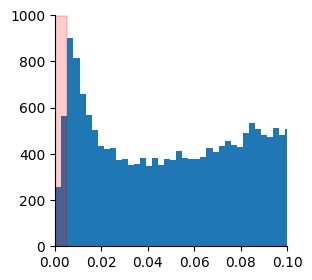

In [99]:
# Plot the distribution of inter-spike interval
plt.figure(figsize=(3,3))
plt.hist(isi[951061549],bins=10000);
plt.fill_betweenx(y=np.arange(0,1000),x1=0,x2=0.005, color='red', alpha=0.2, zorder=2)
plt.ylim(0, 1000)
plt.xlim(0,0.1)
sns.despine()